In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
kiva = pd.read_csv('kivasmall.csv')

In [3]:
kiva.shape

(419156, 28)

Variables of interest: 



In [4]:
kivake = kiva[kiva['COUNTRY_CODE']=='KE']
kivake.shape

(51170, 28)

In [5]:
kivake.isnull().sum()

ORIGINAL_LANGUAGE     1144
LOAN_AMOUNT              0
STATUS                   0
ACTIVITY_NAME            0
SECTOR_NAME              0
COUNTRY_CODE             0
LENDER_TERM              0
REPAYMENT_INTERVAL       0
DISTRIBUTION_MODEL       0
word_count_DT            0
word_count_TAGS          0
word_count_LU            0
char_count_DT            0
char_count_TAGS          0
char_count_LU            0
month                    0
FEM_COUNT             1144
MALE_COUNT            1144
PIC_TRUE_COUNT        1144
PIC_FALSE_COUNT       1144
ANY_FEM               1144
ANY_MALE              1144
word_char_DT             0
word_char_TAGS           0
word_char_LU             0
MALE_FEM              1144
MALE_PIC              1144
FEM_PIC               1144
dtype: int64

In [6]:
fill_values = {'ORIGINAL_LANGUAGE' : 'MISSING', 'FEM_COUNT' : 0, 'MALE_COUNT' : 0,'PIC_TRUE_COUNT' : 0, 'PIC_FALSE_COUNT' : 0,'ANY_FEM' : 0,'ANY_MALE' : 0,'COUNTRY_CODE':'MISSING', 'MALE_FEM':0,'MALE_PIC':0,'FEM_PIC':0}
kivake.fillna(value = fill_values, inplace=True)

C:\Users\shash\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [7]:
kivake.isnull().sum()

ORIGINAL_LANGUAGE     0
LOAN_AMOUNT           0
STATUS                0
ACTIVITY_NAME         0
SECTOR_NAME           0
COUNTRY_CODE          0
LENDER_TERM           0
REPAYMENT_INTERVAL    0
DISTRIBUTION_MODEL    0
word_count_DT         0
word_count_TAGS       0
word_count_LU         0
char_count_DT         0
char_count_TAGS       0
char_count_LU         0
month                 0
FEM_COUNT             0
MALE_COUNT            0
PIC_TRUE_COUNT        0
PIC_FALSE_COUNT       0
ANY_FEM               0
ANY_MALE              0
word_char_DT          0
word_char_TAGS        0
word_char_LU          0
MALE_FEM              0
MALE_PIC              0
FEM_PIC               0
dtype: int64

In [8]:
kivake.columns

Index(['ORIGINAL_LANGUAGE', 'LOAN_AMOUNT', 'STATUS', 'ACTIVITY_NAME',
       'SECTOR_NAME', 'COUNTRY_CODE', 'LENDER_TERM', 'REPAYMENT_INTERVAL',
       'DISTRIBUTION_MODEL', 'word_count_DT', 'word_count_TAGS',
       'word_count_LU', 'char_count_DT', 'char_count_TAGS', 'char_count_LU',
       'month', 'FEM_COUNT', 'MALE_COUNT', 'PIC_TRUE_COUNT', 'PIC_FALSE_COUNT',
       'ANY_FEM', 'ANY_MALE', 'word_char_DT', 'word_char_TAGS', 'word_char_LU',
       'MALE_FEM', 'MALE_PIC', 'FEM_PIC'],
      dtype='object')

In [9]:
kivake.dtypes

ORIGINAL_LANGUAGE      object
LOAN_AMOUNT           float64
STATUS                  int64
ACTIVITY_NAME          object
SECTOR_NAME            object
COUNTRY_CODE           object
LENDER_TERM           float64
REPAYMENT_INTERVAL     object
DISTRIBUTION_MODEL     object
word_count_DT           int64
word_count_TAGS         int64
word_count_LU           int64
char_count_DT           int64
char_count_TAGS         int64
char_count_LU           int64
month                   int64
FEM_COUNT             float64
MALE_COUNT            float64
PIC_TRUE_COUNT        float64
PIC_FALSE_COUNT       float64
ANY_FEM               float64
ANY_MALE              float64
word_char_DT            int64
word_char_TAGS          int64
word_char_LU            int64
MALE_FEM              float64
MALE_PIC              float64
FEM_PIC               float64
dtype: object

In [10]:
kivake.shape

(51170, 28)

In [11]:
catcols = ['ORIGINAL_LANGUAGE', 'ACTIVITY_NAME', 'SECTOR_NAME', 'COUNTRY_CODE', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL', 'month']

for i in range(1,len(catcols)):
    print(kivake.groupby(catcols[i], dropna=False)['STATUS'].agg(['count', 'mean']))
    #print(pd.pivot_table(df, columns = totcols[i], aggfunc=np.count))

                                count      mean
ACTIVITY_NAME                                  
Agriculture                      2283  0.833552
Animal Sales                      179  0.743017
Bakery                             52  0.653846
Beauty Salon                      700  0.652857
Beverages                          68  0.735294
Cattle                            113  0.769912
Cereals                          2689  0.732614
Charcoal Sales                    343  0.760933
Clothing                          342  0.903509
Clothing Sales                   1457  0.636925
Cosmetics Sales                   208  0.634615
Crafts                             45  0.977778
Dairy                            2669  0.826527
Education provider                 69  1.000000
Farm Supplies                     230  0.756522
Farming                         19741  0.822197
Fish Selling                      407  0.778870
Fishing                             6  0.833333
Food                              552  0

In [12]:
kivake_dummies = pd.get_dummies(kivake, drop_first=True)

In [13]:
kivake_dummies.shape

(51170, 88)

In [14]:
kivake_dummies_small = kivake_dummies.sample(51170)

In [15]:
kivake_dummies_small['STATUS'].value_counts()

1    40151
0    11019
Name: STATUS, dtype: int64

In [16]:
#Creating X, y and test-train split
X = kivake_dummies_small.drop(columns = ['STATUS'])
y = kivake_dummies_small['STATUS']

#Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, stratify=y)

#Scale features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
#Building out logistic regressoin with higher max-iter
logreg = LogisticRegression(solver='liblinear', max_iter=1500)
logreg.fit(X_train_sc, y_train)
print(logreg.score(X_train_sc,y_train), logreg.score(X_test_sc,y_test))

0.8296375433202179 0.830219651371844


In [19]:
#See what coefficients came out strong
coef= logreg.coef_[0]
coef_df = pd.DataFrame({'coefficients': coef, 'features': X_train.columns}).sort_values(by = 'coefficients', ascending = False, key = abs).head(25)
coef_df

,coefficients,features
16,3.413107,word_char_TAGS
0,-2.261731,LOAN_AMOUNT
21,2.161144,ORIGINAL_LANGUAGE_MISSING
14,-2.161144,ANY_MALE
3,-1.895456,word_count_TAGS
9,1.221999,FEM_COUNT
50,1.054129,ACTIVITY_NAME_Home Energy
2,-0.670857,word_count_DT
86,-0.625551,DISTRIBUTION_MODEL_field_partner
11,-0.604179,PIC_TRUE_COUNT


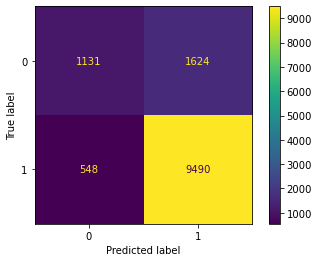

In [20]:
#get predictions 
preds = logreg.predict(X_test_sc)

#plot confusion matrix
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot();

In [21]:
print(f'Various scores:  AUROC: {roc_auc_score(y_test, preds)}, ACC_SCORE: {accuracy_score(y_test, preds)}, REC_SCORE: {recall_score(y_test, preds)}, PREC_SCORE: {precision_score(y_test, preds)},F1: {f1_score(y_test, preds)}')


Various scores:  AUROC: 0.677966883736538, ACC_SCORE: 0.830219651371844, REC_SCORE: 0.9454074516836023, PREC_SCORE: 0.8538779917221523,F1: 0.8973146747352497


In [80]:
#create a list of the model classes to test
model_list = [
    LogisticRegression(max_iter=1200),
    #DecisionTreeClassifier(),
    #BaggingClassifier(),
    RandomForestClassifier(),
    #ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

In [79]:
#create a list to store each model's results in a dictionary
classifier_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj

    #fit the model
    model.fit(X_train_sc, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train_sc, y_train)
    results_dict['test_score'] = model.score(X_test_sc, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train_sc, y_train, cv = 5).mean()
        
    #add the dictionary to the list
    classifier_list.append(results_dict)

In [81]:
#To get just RF model scores
clf_results = pd.DataFrame(classifier_list)
clf_results

,model_name,train_score,test_score,cv_score
0,LogisticRegression(max_iter=1200),0.829638,0.830376,0.829012
1,RandomForestClassifier(),1.000000,0.846244,0.848216
2,AdaBoostClassifier(),0.843031,0.840303,0.842275
3,GradientBoostingClassifier(),0.848998,0.843430,0.846028
4,SVC(),0.832817,0.827875,0.828282


In [46]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 28, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 14, 19, 23, 28], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [2, 4, 8], 'bootstrap': [True, False]}


In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=12, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_sc, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [10, 14, 19, 23, 28]},
                   random_state=42, verbose=12)

In [48]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=15, n_estimators=23)

In [51]:
rf_random.best_score_

0.8477473450708146

In [50]:
preds = rf_random.predict(X_test_sc)
accuracy_score(y_test, preds)

0.8481982334088954

In [61]:
rf_var = pd.DataFrame({'features':X_train.columns, 'coef':rf_random.best_estimator_.feature_importances_})
rf_var.head(28)

,features,coef
0,LOAN_AMOUNT,0.259488
1,LENDER_TERM,0.065497
2,word_count_DT,0.039675
3,word_count_TAGS,0.037076
4,word_count_LU,0.025931
5,char_count_DT,0.045880
6,char_count_TAGS,0.063637
7,char_count_LU,0.037687
8,month,0.050101
9,FEM_COUNT,0.016624


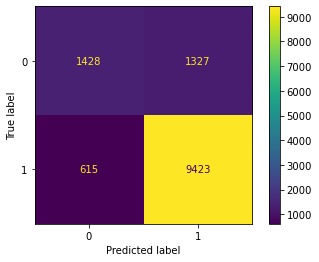

In [62]:
#plot confusion matrix
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot();

In [63]:
print(f'Various scores:  AUROC: {roc_auc_score(y_test, preds)}, ACC_SCORE: {accuracy_score(y_test, preds)}, REC_SCORE: {recall_score(y_test, preds)}, PREC_SCORE: {precision_score(y_test, preds)},F1: {f1_score(y_test, preds)}')


Various scores:  AUROC: 0.7285315619158993, ACC_SCORE: 0.8481982334088954, REC_SCORE: 0.9387328153018529, PREC_SCORE: 0.8765581395348837,F1: 0.9065807196459496


In [33]:
# params and grid search 
params = {
    'n_estimators': [25, 50, 100],
    'max_depth':[3, 5]
}

rf=RandomForestClassifier()

gs_rf = GridSearchCV(rf, param_grid = params, cv=5)
gs_rf.fit(X_train_sc, y_train)

gs_rf.best_estimator_

print(gb3.score(X_train_sc, y_train), gb3.score(X_test_sc, y_test),  
      cross_val_score(gb3, X_train_sc, y_train, cv = 5).mean())

RandomForestClassifier(max_depth=5)

In [44]:
preds = gs_rf.predict(X_test_sc)
accuracy_score(y_test, preds)

0.8170874697099977

In [64]:
# Build a model using Dropout
from tensorflow.keras.layers import Dropout

model_dropout = Sequential()

#First layer
model_dropout.add(Dense(64, activation='relu', input_shape=(X_train_sc.shape[1],)))
model_dropout.add(Dropout(0.5))

#Second layer
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.5))

#Output layer
model_dropout.add(Dense(1, activation='sigmoid'))

#COmpile the model
model_dropout.compile(loss='bce', optimizer='adam', metrics=['acc'])

results_dropout = model_dropout.fit(X_train_sc, y_train,
                                   validation_data=(X_test_sc, y_test),
                                   batch_size=9192,
                                   epochs=100,
                                   verbose=2)

Epoch 1/100
5/5 - 1s - loss: 0.8273 - acc: 0.5012 - val_loss: 0.5936 - val_acc: 0.7700
Epoch 2/100
5/5 - 0s - loss: 0.6609 - acc: 0.6592 - val_loss: 0.5321 - val_acc: 0.7847
Epoch 3/100
5/5 - 0s - loss: 0.5983 - acc: 0.7406 - val_loss: 0.5234 - val_acc: 0.7846
Epoch 4/100
5/5 - 0s - loss: 0.5812 - acc: 0.7661 - val_loss: 0.5158 - val_acc: 0.7846
Epoch 5/100
5/5 - 0s - loss: 0.5671 - acc: 0.7745 - val_loss: 0.5001 - val_acc: 0.7846
Epoch 6/100
5/5 - 0s - loss: 0.5533 - acc: 0.7737 - val_loss: 0.4834 - val_acc: 0.7846
Epoch 7/100
5/5 - 0s - loss: 0.5334 - acc: 0.7734 - val_loss: 0.4715 - val_acc: 0.7852
Epoch 8/100
5/5 - 0s - loss: 0.5241 - acc: 0.7729 - val_loss: 0.4639 - val_acc: 0.7918
Epoch 9/100
5/5 - 0s - loss: 0.5120 - acc: 0.7727 - val_loss: 0.4578 - val_acc: 0.7921
Epoch 10/100
5/5 - 0s - loss: 0.5062 - acc: 0.7767 - val_loss: 0.4515 - val_acc: 0.7919
Epoch 11/100
5/5 - 0s - loss: 0.4997 - acc: 0.7766 - val_loss: 0.4451 - val_acc: 0.7922
Epoch 12/100
5/5 - 0s - loss: 0.4898 - ac

In [65]:
results_dropout = model_dropout.fit(X_train_sc, y_train,
                                   validation_data=(X_test_sc, y_test),
                                   batch_size=5000,
                                   epochs=100,
                                   verbose=2)

Epoch 1/100
8/8 - 0s - loss: 0.3465 - acc: 0.8352 - val_loss: 0.3346 - val_acc: 0.8405
Epoch 2/100
8/8 - 0s - loss: 0.3453 - acc: 0.8355 - val_loss: 0.3344 - val_acc: 0.8411
Epoch 3/100
8/8 - 0s - loss: 0.3452 - acc: 0.8364 - val_loss: 0.3345 - val_acc: 0.8403
Epoch 4/100
8/8 - 0s - loss: 0.3455 - acc: 0.8364 - val_loss: 0.3341 - val_acc: 0.8412
Epoch 5/100
8/8 - 0s - loss: 0.3456 - acc: 0.8365 - val_loss: 0.3337 - val_acc: 0.8411
Epoch 6/100
8/8 - 0s - loss: 0.3456 - acc: 0.8377 - val_loss: 0.3333 - val_acc: 0.8411
Epoch 7/100
8/8 - 0s - loss: 0.3456 - acc: 0.8351 - val_loss: 0.3327 - val_acc: 0.8405
Epoch 8/100
8/8 - 0s - loss: 0.3427 - acc: 0.8369 - val_loss: 0.3321 - val_acc: 0.8412
Epoch 9/100
8/8 - 0s - loss: 0.3430 - acc: 0.8378 - val_loss: 0.3319 - val_acc: 0.8412
Epoch 10/100
8/8 - 0s - loss: 0.3429 - acc: 0.8387 - val_loss: 0.3317 - val_acc: 0.8409
Epoch 11/100
8/8 - 0s - loss: 0.3399 - acc: 0.8381 - val_loss: 0.3319 - val_acc: 0.8411
Epoch 12/100
8/8 - 0s - loss: 0.3424 - ac

### Gradient Boosting Classifier

In [67]:
# Set up a pipeline with Random Forest
pipe_gbc = Pipeline([
    ('gb', GradientBoostingClassifier())
])

In [68]:
# params and grid search 
gbc_params = {
    'gb__n_estimators': [25, 50, 100],
    'gb__max_depth' : [3,4,5],
    'gb__learning_rate': [0.05, 0.1]
}

gs_gbc = GridSearchCV(pipe_gbc, param_grid = gbc_params, cv=5)
gs_gbc.fit(X_train_sc, y_train)
print(f' Best Score from Grid Search is {gs_gbc.best_score_}')
gs_gbc.best_params_

 Best Score from Grid Search is 0.851760156025889


{'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__n_estimators': 100}

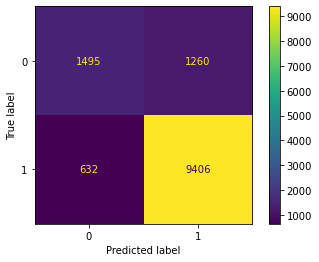

In [71]:
#get predictions 
preds_gb = gs_gbc.predict(X_test_sc)

#plot confusion matrix
cm = confusion_matrix(y_test, preds_gb)
ConfusionMatrixDisplay(cm).plot();

In [72]:
print(f'Various scores:  AUROC: {roc_auc_score(y_test, preds)}, ACC_SCORE: {accuracy_score(y_test, preds)}, REC_SCORE: {recall_score(y_test, preds)}, PREC_SCORE: {precision_score(y_test, preds)},F1: {f1_score(y_test, preds)}')


Various scores:  AUROC: 0.7285315619158993, ACC_SCORE: 0.8481982334088954, REC_SCORE: 0.9387328153018529, PREC_SCORE: 0.8765581395348837,F1: 0.9065807196459496


In [76]:
gb2 = GradientBoostingClassifier(n_estimators=100, 
                        min_samples_split = 100, 
                        min_samples_leaf = 50, 
                        max_depth=5,
                        max_features='sqrt',
                        learning_rate = 0.1)
gb2.fit(X_train_sc, y_train)
print(gb2.score(X_train_sc, y_train), gb2.score(X_test_sc, y_test),  
      cross_val_score(gb2, X_train_sc, y_train, cv = 5).mean())

0.8553300153737916 0.8491362463847416 0.8487114047252489


In [77]:
pd.DataFrame({'importance' : gb2.feature_importances_, 'feature_names' : X_train.columns}).sort_values(by='importance', ascending=False).head(25)

,importance,feature_names
0,0.406740,LOAN_AMOUNT
1,0.063692,LENDER_TERM
6,0.056521,char_count_TAGS
8,0.055282,month
16,0.044822,word_char_TAGS
9,0.039004,FEM_COUNT
20,0.038258,FEM_PIC
3,0.036420,word_count_TAGS
13,0.033659,ANY_FEM
15,0.027852,word_char_DT
